In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_AN_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,NaN,13.64,NaN,1.10,71.78,NaN,NaN,NaN,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,NaN,3.69,NaN,72.61,NaN,NaN,0.00,0.0
4,NaN,13.27,3.62,NaN,73.08,0.55,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,NaN,NaN,NaN,NaN,1.06,0.0
210,1.51685,NaN,0.00,1.99,NaN,0.00,NaN,NaN,0.0
211,NaN,NaN,0.00,2.02,NaN,0.00,8.44,NaN,0.0
212,1.51651,NaN,0.00,1.94,NaN,0.00,NaN,NaN,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	30
float64		column 2	33
float64		column 3	30
float64		column 4	53
float64		column 5	50
float64		column 6	53
float64		column 7	83
float64		column 8	50
float64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,184.000000,181.000000,184.000000,161.000000,164.000000,161.000000,131.000000,164.000000,214.000000
mean,1.518428,13.348232,2.722391,1.412981,72.655732,0.463106,8.868550,0.131951,0.057009
std,0.003045,0.758319,1.402479,0.449192,0.681292,0.358912,1.208387,0.408935,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.890000,0.000000,5.430000,0.000000,0.000000
25%,1.516573,12.930000,2.260000,1.190000,72.330000,0.160000,8.290000,0.000000,0.000000
50%,1.517690,13.270000,3.480000,1.350000,72.800000,0.550000,8.600000,0.000000,0.000000
75%,1.519095,13.730000,3.602500,1.630000,73.100000,0.610000,9.065000,0.000000,0.100000
max,1.533930,15.790000,3.980000,3.040000,74.450000,2.700000,14.960000,2.880000,0.510000


<AxesSubplot:>

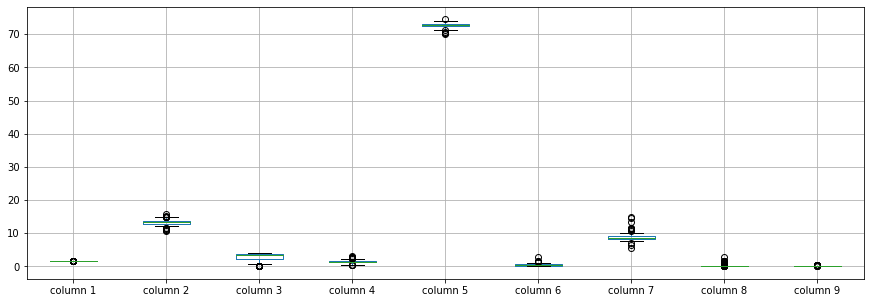

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518428
column 2    13.348232
column 3     2.722391
column 4     1.412981
column 5    72.655732
column 6     0.463106
column 7     8.868550
column 8     0.131951
column 9     0.057009
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.144538,-0.045424,-0.394282,-0.610362,-0.393364,0.779863,-0.142659,0.168795
column 2,-0.144538,1.000000,-0.202926,0.045933,-0.399459,-0.257863,-0.171686,0.503213,-0.222721
column 3,-0.045424,-0.202926,1.000000,-0.437363,-0.269106,0.233953,-0.428594,-0.543170,0.149894
column 4,-0.394282,0.045933,-0.437363,1.000000,0.255492,0.124356,-0.351292,0.376403,-0.097105
column 5,-0.610362,-0.399459,-0.269106,0.255492,1.000000,0.030313,-0.223166,0.069782,0.020563
column 6,-0.393364,-0.257863,0.233953,0.124356,0.030313,1.000000,-0.517831,0.003040,-0.000640
column 7,0.779863,-0.171686,-0.428594,-0.351292,-0.223166,-0.517831,1.000000,-0.208165,0.034768
column 8,-0.142659,0.503213,-0.543170,0.376403,0.069782,0.003040,-0.208165,1.000000,-0.112171
column 9,0.168795,-0.222721,0.149894,-0.097105,0.020563,-0.000640,0.034768,-0.112171,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [21]:
imputer = md.Midas(layer_structure = [9,9+49,9+49+49,9+49+49+49,9+49+49+49+49,9+49+49+49+49+49,9+49+49+49+49+49+49,9+49+49+49+49+49,9+49+49+49+49,9+49+49+49,9+49+49,9+49,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=56)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 78.90880995530348
Epoch: 1 , loss: 78.52908149132362
Epoch: 2 , loss: 78.10218811035156
Epoch: 3 , loss: 78.45884528526894
Epoch: 4 , loss: 78.85431759174054
Epoch: 5 , loss: 78.38386036799504
Epoch: 6 , loss: 78.9452655498798
Epoch: 7 , loss: 78.41296093280499
Epoch: 8 , loss: 77.95099229079027
Epoch: 9 , loss: 77.86064852201022
Epoch: 10 , loss: 77.98655612652118
Epoch: 11 , loss: 77.63466380192683
Epoch: 12 , loss: 77.43761678842398
Epoch: 13 , loss: 78.37503697321965
Epoch: 14 , loss: 78.79747038621169
Epoch: 15 , loss: 77.39712142944336
Epoch: 16 , loss: 77.85372103177585
Epoch: 17 , loss: 77.84229982816257
Epoch: 18 , loss: 77.62501525878906
Epoch: 19 , loss: 77.80094616229718
Epoch: 20 , loss: 76.53194016676683
Epoch: 21 , loss: 75.55943122276894
Epoch: 22 , loss: 76.20028598491962
Epoch: 23 , loss: 76.29817405113808
Epoch: 24 , loss: 75.25569769052359
Epoch: 25 , loss: 74.92273888221153
Epoch: 2

In [22]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [23]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [24]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [25]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,-0.941782,0.000000,-3.723805,0.000000,0.000000,0.140930,-5.132129,0.100519,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,-1.226953,0.000000,0.058608,0.000000,-0.083040,-0.575268,0.000000,0.0
4,-0.720770,0.000000,0.000000,-0.444206,0.000000,0.000000,-3.012679,0.098774,0.0
...,...,...,...,...,...,...,...,...,...
209,0.000000,0.000000,0.000000,-0.768233,25.099679,0.751974,4.503565,0.000000,0.0
210,0.000000,-2.732928,0.000000,0.000000,-9.591330,0.000000,-0.402521,-1.424944,0.0
211,-0.288882,-2.891367,0.000000,0.000000,-19.695661,0.000000,0.000000,-1.505871,0.0
212,0.000000,-10.112195,0.000000,0.000000,-58.106246,0.000000,-5.347705,-1.535138,0.0


Calculating NRMSE Value

In [26]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [27]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [28]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(283.5668688501644, 1090.4359815890969)

In [29]:
NRMS=numerator/denominator
NRMS


0.2600490754504645

In [30]:
new_df.iloc[66,:]

column 1     1.52152
column 2    13.05000
column 3     3.65000
column 4     0.87000
column 5    72.22000
column 6     0.19000
column 7     9.85000
column 8     0.00000
column 9     0.17000
Name: 66, dtype: float64

In [31]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.579228,13.640000,0.766195,1.100000,71.780000,0.200930,3.617871,0.100519,0.0
1,1.517610,13.890000,3.600000,1.360000,72.730000,0.480000,7.830000,0.000000,0.0
2,1.516180,13.530000,3.550000,1.540000,72.990000,0.390000,7.780000,0.000000,0.0
3,1.517660,11.983047,3.690000,1.348608,72.610000,0.486960,7.644732,0.000000,0.0
4,0.796650,13.270000,3.620000,0.795794,73.080000,0.550000,5.057321,0.098774,0.0
...,...,...,...,...,...,...,...,...,...
209,1.516230,14.140000,0.000000,2.111767,97.709679,0.831974,13.683565,1.060000,0.0
210,1.516850,12.187072,0.000000,1.990000,63.468670,0.000000,7.997479,0.165056,0.0
211,1.231768,11.468633,0.000000,2.020000,53.724339,0.000000,8.440000,0.134129,0.0
212,1.516510,4.267805,0.000000,1.940000,15.503754,0.000000,3.132295,0.034862,0.0


In [32]:
imputations[-1].to_excel("Glass_AN_20(imp).xlsx", index=False, header=False)